     CustomerID   Genre   Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male  19.0                15.0                    39.0
1             2    Male  21.0                15.0                    81.0
2             3  Female  20.0                16.0                     6.0
3             4  Female  23.0                16.0                    77.0
4             5  Female  31.0                17.0                    40.0
..          ...     ...   ...                 ...                     ...
195         196  Female  35.0               120.0                    79.0
196         197  Female  45.0               126.0                    28.0
197         198    Male  32.0               126.0                    74.0
198         199    Male  32.0               137.0                    18.0
199         200    Male  30.0               137.0                    83.0

[200 rows x 5 columns]


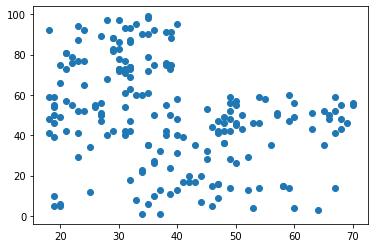

In [102]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer as SI
import matplotlib.pyplot as plt
file=pd.read_csv('Mall_Customers_2.csv')
dk = SI(missing_values=np.nan,strategy='mean')
file.iloc[:,2:5]=dk.fit_transform(file.iloc[:,2:5])
print(file)
plt.scatter(file['Age'],file['Spending Score (1-100)'])



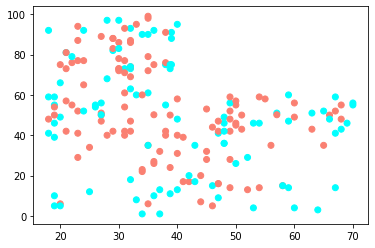

In [103]:
def cs(m):
    """
    param:
    input:mảng chứa giới tính dạng chữ
    output:mảng chứa giới tính nếu nam là xanh nước biển ,nữ là màu hồng
    """
    c=[]
    for i in m:
        if i=='Male':
            c.append('aqua')
        else:
            c.append('salmon')
    return c
colors=cs(file['Genre'])# chạy hàm lấy mảng
plt.scatter(file['Age'],file['Spending Score (1-100)'],color=colors,alpha=1)# vẽ đồ thị scatter lấy màu theo mảng colors
                                                                        # độ trong suốt là 1


32.0   137.0


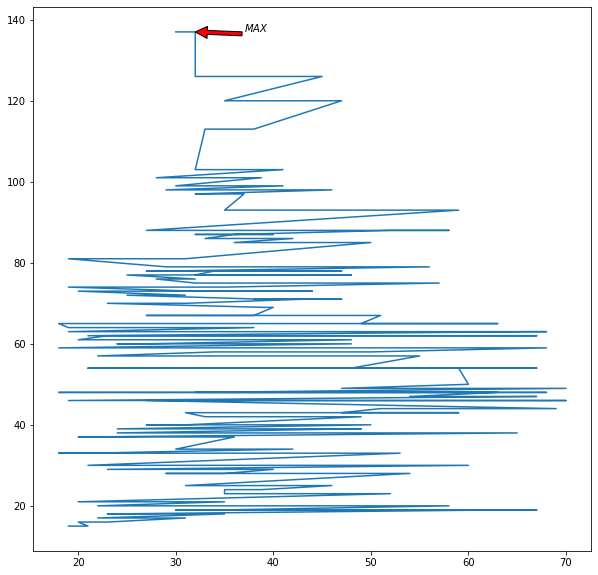

In [104]:
fig,ax= plt.subplots(figsize=(10,10))
def k(a,b):# hàm lấy vị trí của điểm lớn nhất
    """
    :param:
    input:mảng tuổi và mảng thu nhập
    output: id của người có thu nhập cao nhất
    """
    x=0
    y=0
    for i in range(0,len(b)):
        if y<b[i]:
            x=a[i]
            y=b[i]
    return x,y
plt.plot(file['Age'],file['Annual Income (k$)'])# vẽ đồ thị

xmale,ymale=k(file['Age'],file['Annual Income (k$)'])#tìm điểm lớn nhất
print (xmale," ",ymale)
ax.annotate('$MAX$', xy=(xmale,ymale),xytext=(xmale+5,ymale), arrowprops=dict(facecolor='red'));#vẽ mũi tên


In [140]:
#bài2
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer 
import matplotlib.pyplot as plt
file = pd.read_csv('Social_Network_Ads_2.csv')
k= SimpleImputer(missing_values=np.nan,strategy='mean')
file.iloc[:,1:3]=k.fit_transform(file.iloc[:,1:3])
print(file)

     Age  EstimatedSalary  Purchased
0     19          19000.0        0.0
1     35          20000.0        0.0
2     26          43000.0        0.0
3     27          57000.0        0.0
4     19          76000.0        0.0
..   ...              ...        ...
395   46          41000.0        1.0
396   51          23000.0        1.0
397   50          20000.0        1.0
398   36          33000.0        0.0
399   49          36000.0        1.0

[400 rows x 3 columns]


In [141]:
def status(m):
    """
    param:
    input:mảng Purchased gồm 0 và 1
    output: mảng c là mảng gồm 'Chưa mua ' và 'Đã mua'
    """
    c=[]
    for i in m :
        if i==0:
            c.append('Chưa mua')
        else:
            c.append('Đã mua')
    return c
Statuss=status(file.Purchased) # tạo thông số mảng Status
file['Status']=Statuss # thêm cột Status
del file['Purchased']# xóa cột Purchased
print(file)

     Age  EstimatedSalary    Status
0     19          19000.0  Chưa mua
1     35          20000.0  Chưa mua
2     26          43000.0  Chưa mua
3     27          57000.0  Chưa mua
4     19          76000.0  Chưa mua
..   ...              ...       ...
395   46          41000.0    Đã mua
396   51          23000.0    Đã mua
397   50          20000.0    Đã mua
398   36          33000.0  Chưa mua
399   49          36000.0    Đã mua

[400 rows x 3 columns]


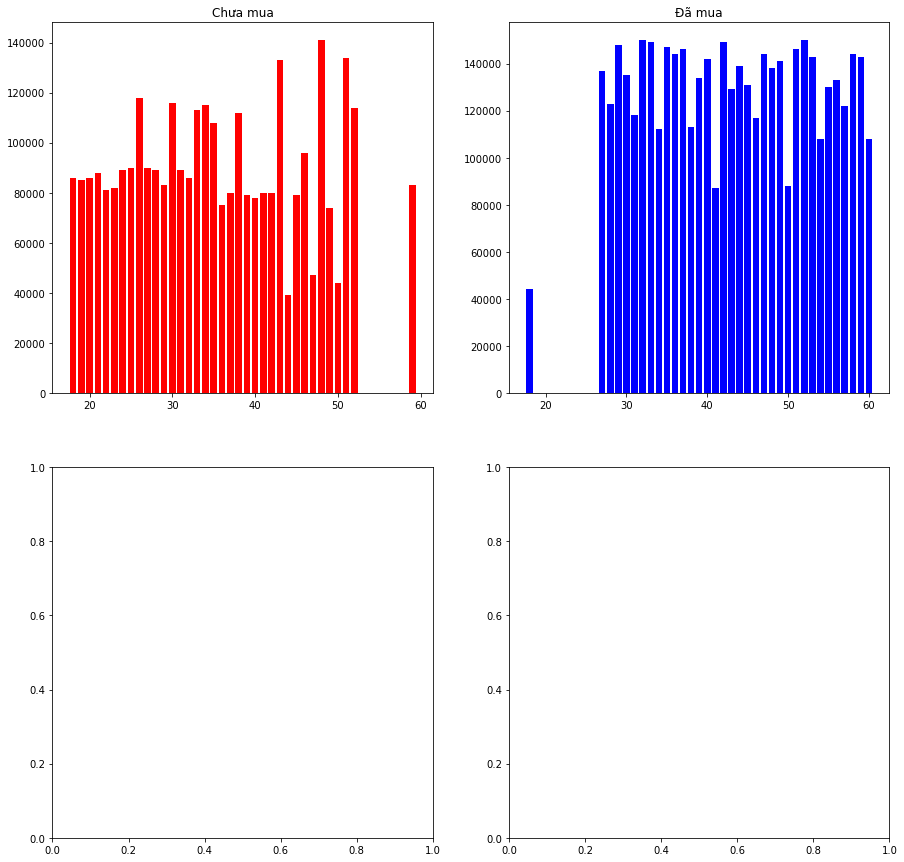

In [146]:
fig , newc=plt.subplots(ncols=2, nrows=2, figsize=(15,15))
def tach(a,b,m):
    x1=[]
    y1=[]
    x2=[]
    y2=[]
    for i in range(0,len(m)) :
        if m[i] == 'Chưa mua':
            x1.append(a[i])
            y1.append(b[i])
        else:
            x2.append(a[i])
            y2.append(b[i])
    return x1,y1,x2,y2
chuamuax,chuamuay,damuax,damuay=tach(file.Age,file.EstimatedSalary,file.Status)
newc[0,0].bar(chuamuax,chuamuay,color='red')
newc[0,0].set_title('Chưa mua');
newc[0,1].bar(damuax,damuay,color='blue');
newc[0,1].set_title('Đã mua');

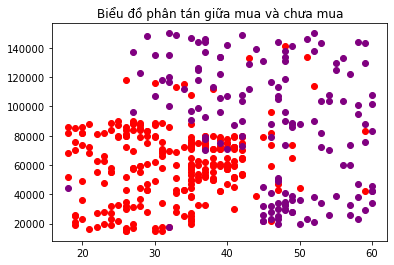

In [151]:
plt.scatter(chuamuax,chuamuay,c='red');
plt.scatter(damuax,damuay,c='purple');
plt.title('Biểu đồ phân tán giữa mua và chưa mua');